# List Comprehensions and Generator Expressions

In [3]:
x = 'ABC'
for x in x:
    print(x)
x  # prints 'after loop: C'

A
B
C


'C'

Explanation: the iterator was created from the original 'ABC', and the loop then assigns each item to x (overwriting the name). The loop still completes normally.

In [4]:

x = 'ABC'
codes = [ord(x) for x in x]
x # prints 'ABC'

'ABC'

Explanation: in Python 3 comprehensions have their own scope, so the outer x is not overwritten.

In [6]:
codes = [last := ord(c) for c in x]
codes, last

([65, 66, 67], 67)

- Comprehension loop variables = local to the comprehension (do not leak).
- Walrus := target = assigned to the enclosing scope (function or module), unless global/nonlocal dictates otherwise.

In [11]:
symbols = '$¢£¥€¤'
beyond_ascii = [ord(s) for s in symbols if ord(s) > 127]
beyond_ascii

[162, 163, 165, 8364, 164]

- __filter(function, iterable)__ runs function(item) for each item in iterable and yields only the items where the result is truthy. In Python 3 it returns an iterator (not a list), so you must consume it (e.g., with list() or a for loop).
- __map(function, *iterables)__ applies function to items from the iterable(s) and returns a lazy iterator of results.

In [12]:
beyond_ascii = list(filter(lambda c: c > 127, map(ord, symbols)))
beyond_ascii

[162, 163, 165, 8364, 164]

Listcomps do everything the map and filter functions do, without the contortions of
the functionally challenged Python lambda. 

In [13]:
colors = ['black', 'white']
sizes = ['S', 'M', 'L']
tshirts = [(color, size) for color in colors 
                        for size in sizes]
tshirts

[('black', 'S'),
 ('black', 'M'),
 ('black', 'L'),
 ('white', 'S'),
 ('white', 'M'),
 ('white', 'L')]

Adding a line break to the listcomp makes it easier to see how the result will be ordered.

- List comprehensions ([expr for ...]) build the entire list in memory immediately.
- Generator expressions (e.g., `(expr for ...)`) produce values lazily — one at a time — returning a generator (an iterator) that yields items only when requested. Because they don't build the full sequence in memory, they're more memory-efficient for large or infinite streams.  
- Generator expressions use parentheses. When the generator is the only argument to a function, you can omit the outer parentheses; for example: `sum(x*x for x in range(10))`.


Performance trade-offs
- If you need all items and will iterate multiple times or need indexing, a list is usually faster (list comprehension is implemented in C and is efficient).
- For single-pass processing of large data, genexp is better because it avoids huge memory allocation.
- Generators have slightly more per-item overhead (function/iterator protocol), so for small sizes list comprehensions are often faster.

In [14]:
symbols = '$¢£¥€¤'
tuple(ord(symbol) for symbol in symbols)

(36, 162, 163, 165, 8364, 164)

In [15]:
import array
array.array('I', (ord(symbol) for symbol in symbols))

array('I', [36, 162, 163, 165, 8364, 164])

The array constructor takes two arguments, so the parentheses around the gen
erator expression are mandatory. The first argument of the array constructor
defines the storage type used for the numbers in the array

In [16]:
colors = ['black', 'white']
sizes = ['S', 'M', 'L']

for tshirt in ('%s %s' % (c, s) for c in colors for s in sizes):
    print(tshirt)

black S
black M
black L
white S
white M
white L


The generator expression yields items one by one; a list with all six T-shirt varia
tions is never produced in this example. Here the idea
was just to show the use of generator expressions to initialize
sequences other than lists, or to produce output that you don’t
need to keep in memory.

__Tuples as Records__

In [17]:
lax_coordinates = (33.9425, -118.408056)
city, year, pop, chg, area = ('Tokyo', 2003, 32_450, 0.66, 8014)
traveler_ids = [('USA', '31195855'), ('BRA', 'CE342567'), ('ESP', 'XDA205856')]

for passport in sorted(traveler_ids):
    print('%s/%s' % passport)

BRA/CE342567
ESP/XDA205856
USA/31195855


In [18]:
for country, _ in traveler_ids:
    print(country)

USA
BRA
ESP


1. Latitude and longitude of the Los Angeles International Airport.
2. Data about Tokyo: name, year, population (thousands), population change (%),
and area (km²).
3. A list of tuples of the form (country_code, passport_number).
4. As we iterate over the list, passport is bound to each tuple.
5. The % formatting operator understands tuples and treats each item as a separate
field.
6. The for loop knows how to retrieve the items of a tuple separately—this is called
“unpacking.” Here we are not interested in the second item, so we assign it to _, a
dummy variable

- _ is commonly used as a throwaway (dummy) variable in code.
- In a match/case statement, _ is a wildcard pattern that matches anything and is not bound.
- In the interactive Python console (REPL), _ holds the last non-None evaluated expression.
- Other underscore conventions: _name suggests “internal use”, and __name triggers name-mangling in classes.

- Name-mangling is a compile-time text transformation Python applies to identifiers that begin with at least two leading underscores and do not end with two trailing underscores. It helps avoid accidental name collisions in subclasses — it is not access control.
1. An identifier of the form __name (at least two leading underscores, not ending with __) inside a class body is transformed to:
_ClassName__name
where ClassName is the class’s name with any leading underscores removed.
2. This happens while the class body is being compiled (before runtime). Example:
class A: def __f(self): ... → method stored as _A__f.

In [19]:
class A:
    def __init__(self):
        self.__x = 1    # actually stored as self._A__x

a = A()
# From outside, you can still access it:
a._A__x   # -> 1
# But a.__x raises AttributeError

1

__Tuples as Immutable Lists__

- __Clarity:__ When you see a tuple in code, you know its length will never change.
- __Performance:__ A tuple uses less memory than a list of the same length, and it allows Python
to do some optimizations.

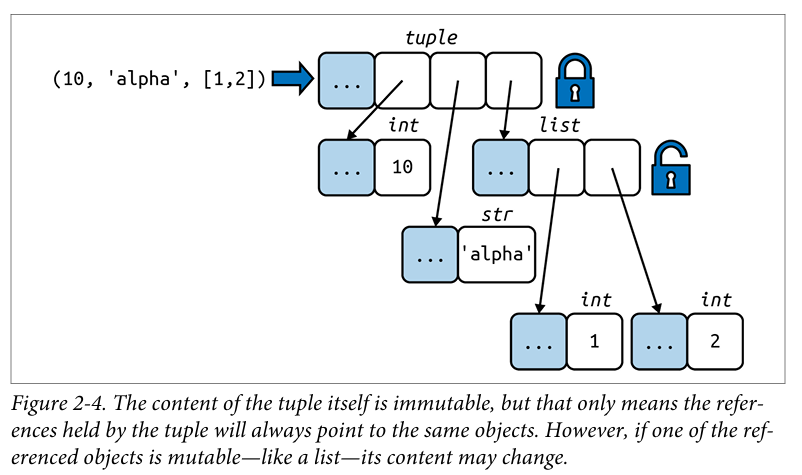

An object is only hashable if its value cannot ever change. An unhashable tuple cannot be inserted as a dict key, or a set element.

In [22]:
# If you want to determine explicitly if a tuple (or any object) has a fixed value, you can use the hash built-in to create a fixed function like this
def hashable(obj):
    try:
        hash(obj)
    except TypeError:
        return False
    return True

hashable((1, 2, (2, 3))), hashable((1, 2, [2, 3]))   # True, False

(True, False)

__List vs. Tuple Performance__

1. Tuple literals can be compiled as single constants (bytecode) 
- For a literal tuple of constants the compiler often folds it into a single constant at compile time. The function simply does LOAD_CONST (the tuple) → RETURN_VALUE.
- A list literal is built at runtime: the compiler emits instructions that push each element and then a BUILD_LIST n operation to allocate the list and fill it.
- Consequence: creating a tuple literal can be cheaper at runtime and can reuse the same object (constant) across calls, while a list literal builds a fresh object each time

2. tuple(t) may return the same object, list(l) must copy
- If the constructor receives an existing tuple CPython recognizes that and simply returns a new reference to the same object (no element copy). So tuple(t) is t can be True.
- list(l) always creates a fresh list and copies the item references (so list(l) is l is False).

3. Tuples are allocated with exact size; lists over-allocate for amortized appends ⚖️
- A tuple is immutable: when created, Python allocates exactly the space needed for its items. No extra capacity is reserved.
- A list is mutable and must support append efficiently, so it over-allocates extra capacity (geometric growth). This makes append amortized O(1), but means lists use more peak memory.

4. Storage layout and cache locality — tuples win on indirection and locality
- Implementation detail (CPython): a tuple object stores its element references tightly with the tuple structure (single allocation; items are placed contiguously).
- A list object holds a pointer to a separate array of pointers (the array can be resized and reallocated as it grows). That extra level (object → pointer → element) increases indirection.
- Effect on CPU: contiguous, single-allocation data improves spatial locality and CPU cache usage; fewer pointer hops and fewer allocations reduce overhead and fragmentation.


In [23]:
# Demo: tuples vs lists — disassembly, identity, and size comparisons
import dis
import sys

def f_tuple_literal():
    return (1, 2, 3)

def g_list_literal():
    return [1, 2, 3]

print("--- disassembly: tuple literal ---")
dis.dis(f_tuple_literal)
print("\n--- disassembly: list literal ---")
dis.dis(g_list_literal)

# identity / copy behavior
t = (1, 2, 3)
print("tuple(t) is t:", tuple(t) is t)
l = [1, 2, 3]
print("list(l) is l:", list(l) is l)

# size comparisons for growing collections
print('\n--- getsizeof for small sizes ---')
for n in (0, 1, 2, 4, 8, 16, 32):
    lst = list(range(n))
    tup = tuple(range(n))
    print(f"n={n:2d}: list={sys.getsizeof(lst):4d} bytes, tuple={sys.getsizeof(tup):4d} bytes")

# list overallocation behavior
print('\n--- list growth (n, size in bytes) ---')
lst = []
for i in range(64):
    lst.append(i)
    if i < 8 or i % 8 == 7:
        print(i + 1, sys.getsizeof(lst))

--- disassembly: tuple literal ---
  5           RESUME                   0

  6           LOAD_CONST               1 ((1, 2, 3))
              RETURN_VALUE

--- disassembly: list literal ---
  8           RESUME                   0

  9           BUILD_LIST               0
              LOAD_CONST               1 ((1, 2, 3))
              LIST_EXTEND              1
              RETURN_VALUE
tuple(t) is t: True
list(l) is l: False

--- getsizeof for small sizes ---
n= 0: list=  56 bytes, tuple=  48 bytes
n= 1: list=  72 bytes, tuple=  56 bytes
n= 2: list=  72 bytes, tuple=  64 bytes
n= 4: list=  88 bytes, tuple=  80 bytes
n= 8: list= 120 bytes, tuple= 112 bytes
n=16: list= 184 bytes, tuple= 176 bytes
n=32: list= 312 bytes, tuple= 304 bytes

--- list growth (n, size in bytes) ---
1 88
2 88
3 88
4 88
5 120
6 120
7 120
8 120
16 184
24 248
32 312
40 376
48 472
56 568
64 568


Tuple supports all list methods that do
not involve adding or removing items, with one exception—tuple lacks the
\_\_reversed__ method. However, that is just for optimization; reversed(my_tuple)
works without it